# QHO Wavefunctions and Probability Densities
This notebook animates the wavefunctions and probability densities.

In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from qho import QuantumHarmonicOscillator
from math import ceil

## Calculating <sup>1</sup>H<sup>35</sup>Cl
The <sup>1</sup>H<sup>35</sup>Cl molecule has the following bond force constant (k) and reduced mass (m<sub>r</sub>):
$$ k = 481 N/m $$
$$ m_r = 1.627 \times 10^{-27} kg $$

### Set the values in variables

In [2]:
k = 481.  # Bond force constant
mass_r = 1.627e-27  # Reduced mass
x_min = -0.5e-10  # Minimum distance to plot in meters
x_max = 0.5e-10  # Maximum distance to plot in meters
n_points = 1000  # Number of points to to calculate between the min and max

qho = QuantumHarmonicOscillator(k=k, mass_r=mass_r)
vs = range(qho.max_v() + 1)
wavefunctions = [qho.wavefunction_across_range(v, x_min, x_max, n_points) for v in vs]
prob_densities = [qho.prob_density(v, x_min, x_max, n_points) for v in vs]

## Plot wavefunction/prob density pairs
### Settings for animation and colors

In [3]:
dpi = 100
width = 1080 / dpi
height = 1920 * 2 / 3 / dpi
num_frames = 210
bgcolor = "#1E1E1E"
line_color_1 = "#73FBD3"
line_color_2 = "#B0A1BA"
axis_color = "#01BAEF"
annotation_color = "#FFFFFF"
heading_text_color = "#FC7753"

### Make the animations

Animating v=0


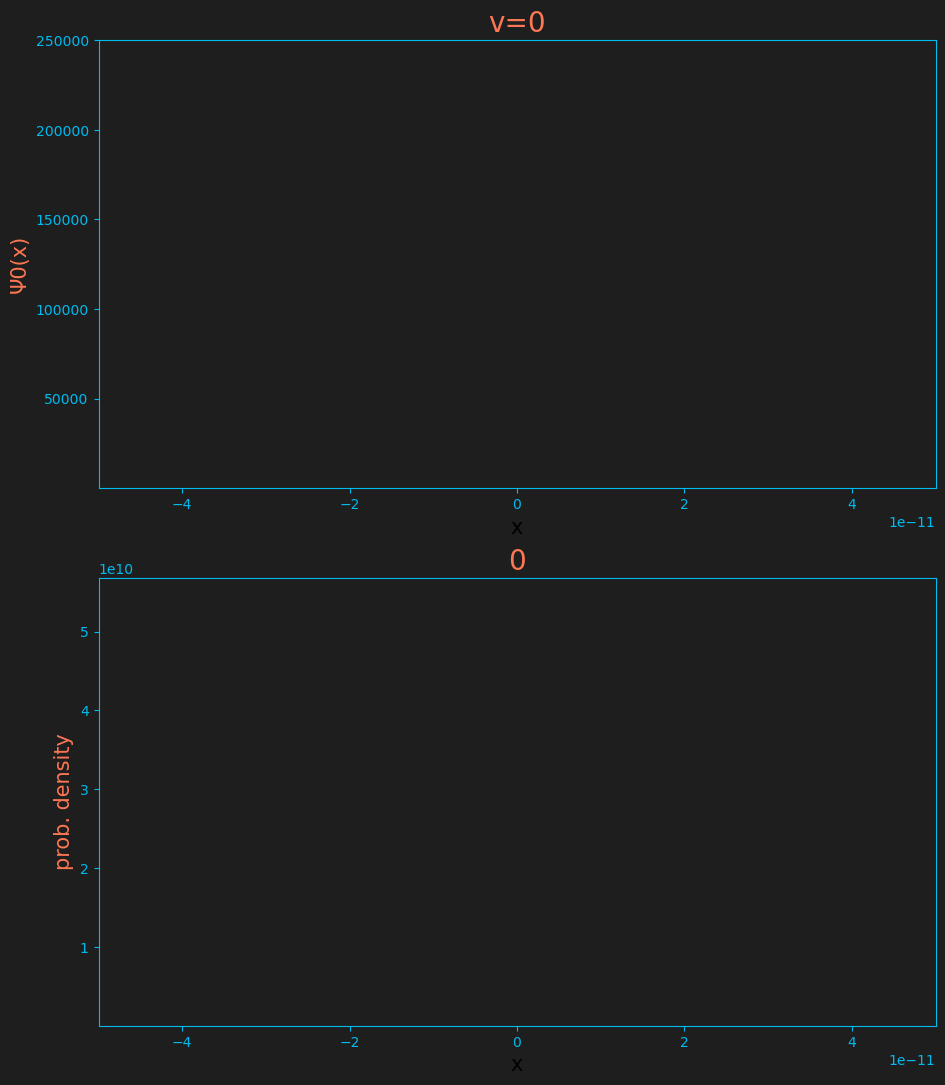

In [10]:
fig, axs = plt.subplots(nrows=2, ncols=1, dpi=dpi, figsize=(width, height))

for ax in axs:
    ax.set_facecolor(bgcolor)
    fig.set_facecolor(bgcolor)
    ax.tick_params(axis='x', colors=axis_color)
    ax.tick_params(axis='y', colors=axis_color)

    for spine_direction in ["top", "right", "bottom", "left"]:
        ax.spines[spine_direction].set_color(axis_color)

v = 0
print(f'Animating v={v}')

axs[0].set_title(f'v={v}', size=20, color=heading_text_color)
axs[0].set_ylabel(f'Ψ{v}(x)', size=15, color=heading_text_color)
axs[0].set_xlabel('x', size=15)
axs[0].set_xlim(x_min, x_max)
axs[0].set_ylim(min(wavefunctions[v][1]), max(wavefunctions[v][1])*1.1)
wavefunction_line = axs[0].plot(wavefunctions[v][0][0], wavefunctions[v][1][0], color=line_color_1, lw=5, solid_capstyle='round')

prob_density_title = axs[1].set_title('probability=0%', size=20, color=heading_text_color)
axs[1].set_ylabel(f'prob. density', size=15, color=heading_text_color)
axs[1].set_xlabel('x', size=15)
axs[1].set_xlim(x_min, x_max)
axs[1].set_ylim(min(prob_densities[v][1]), max(prob_densities[v][1])*1.1)
prob_density_line = axs[1].plot(prob_densities[v][0][0], prob_densities[v][1][0], color=line_color_2, lw=5, solid_capstyle='round')

points_per_frame = int(ceil(n_points / num_frames))

def update(frame):
    wavefunction_line[0].set_xdata(wavefunctions[v][0][:points_per_frame*frame])
    wavefunction_line[0].set_ydata(wavefunctions[v][1][:points_per_frame*frame])
    prob_density_line[0].set_xdata(prob_densities[v][0][:points_per_frame*frame])
    prob_density_line[0].set_ydata(prob_densities[v][1][:points_per_frame*frame])
    prob_density_title.set_text(f'{frame}')
    return wavefunction_line[0], prob_density_line[0], prob_density_title

ani = animation.FuncAnimation(fig=fig, func=update, frames=num_frames, interval=33)
ani.save(filename=os.path.join('output', f'wavefunction_prob_density_{v}.mp4'), writer='ffmpeg')